In [28]:
import pandas as pd
from pyspark.sql.functions import col, lit, expr, when, to_timestamp
from pyspark.sql.types import *
from datetime import datetime
import time
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import month, desc, hour, count, avg

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, IntegerType, DoubleType

# Define schema
nyc_schema = StructType([
    StructField('Vendor', StringType(), True),
    StructField('tpep_pickup_datetime', TimestampType(), True),
    StructField('tpep_dropoff_datetime', TimestampType(), True),
    StructField('Passenger_Count', IntegerType(), True),
    StructField('Trip_Distance', DoubleType(), True),
    StructField('Pickup_Longitude', DoubleType(), True),
    StructField('Pickup_Latitude', DoubleType(), True),
    StructField('Rate_Code', StringType(), True),
    StructField('Store_And_Forward', StringType(), True),
    StructField('Dropoff_Longitude', DoubleType(), True),
    StructField('Dropoff_Latitude', DoubleType(), True),
    StructField('Payment_Type', StringType(), True),
    StructField('Fare_Amount', DoubleType(), True),
    StructField('Surcharge', DoubleType(), True),
    StructField('MTA_Tax', DoubleType(), True),
    StructField('Tip_Amount', DoubleType(), True),
    StructField('Tolls_Amount', DoubleType(), True),
    StructField('Total_Amount', DoubleType(), True)
])

# Create SparkSession
spark = SparkSession.builder \
    .appName("FTP_practice") \
    .getOrCreate()

# Load CSV file
rawDF = spark.read.format('csv') \
    .options(header=True) \
    .schema(nyc_schema) \
    .load(r"C:\Users\alexw\Desktop\yellow_tripdata_2015-01.csv")

In [15]:
num_rows = rawDF.count()

# Getting the number of columns
num_cols = len(rawDF.columns)

# Printing the shape of the DataFrame
print("DataFrame shape: ({}, {})".format(num_rows, num_cols))

DataFrame shape: (12748986, 18)


In [16]:
columns_list = rawDF.columns

# Printing the list of columns
print("Columns of the DataFrame:", columns_list)

Columns of the DataFrame: ['Vendor', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'Passenger_Count', 'Trip_Distance', 'Pickup_Longitude', 'Pickup_Latitude', 'Rate_Code', 'Store_And_Forward', 'Dropoff_Longitude', 'Dropoff_Latitude', 'Payment_Type', 'Fare_Amount', 'Surcharge', 'MTA_Tax', 'Tip_Amount', 'Tolls_Amount', 'Total_Amount']


In [17]:
Vendor_frame = rawDF.groupBy("Passenger_Count").count().withColumnRenamed("count", "Loadcnt").orderBy(col("Loadcnt").desc())
Vendor_frame.show()

+---------------+-------+
|Passenger_Count|Loadcnt|
+---------------+-------+
|              1|8993870|
|              2|1814594|
|              5| 697645|
|              3| 528486|
|              6| 454568|
|              4| 253228|
|              0|   6565|
|              9|     11|
|              8|     10|
|              7|      9|
+---------------+-------+



In [18]:
rawDF.describe()

DataFrame[summary: string, Vendor: string, Passenger_Count: string, Trip_Distance: string, Pickup_Longitude: string, Pickup_Latitude: string, Rate_Code: string, Store_And_Forward: string, Dropoff_Longitude: string, Dropoff_Latitude: string, Payment_Type: string, Fare_Amount: string, Surcharge: string, MTA_Tax: string, Tip_Amount: string, Tolls_Amount: string, Total_Amount: string]

In [19]:
hourly_pickup_counts = rawDF.groupBy(hour("tpep_pickup_datetime").alias("Hour (24HR time)")).agg(count("*").alias("Pickup_Count"))

# Show the count of pickups per hour
hourly_pickup_counts.show()

+----------------+------------+
|Hour (24HR time)|Pickup_Count|
+----------------+------------+
|              12|      637479|
|              22|      686959|
|               1|      355145|
|              13|      635587|
|              16|      576598|
|               6|      268455|
|               3|      198524|
|              20|      733952|
|               5|      127437|
|              19|      805230|
|              15|      648688|
|               9|      580034|
|              17|      668790|
|               4|      143271|
|               8|      561802|
|              23|      592429|
|               7|      456127|
|              10|      567818|
|              21|      711579|
|              11|      596504|
+----------------+------------+
only showing top 20 rows



In [22]:
averages = rawDF.select(
    avg("Passenger_Count").alias("Avg_Passenger_Count"),
    avg("Trip_Distance").alias("Avg_Trip_Distance"),
    avg("Fare_Amount").alias("Avg_Fare_Amount"),
    avg("Surcharge").alias("Avg_Surcharge"),
    avg("MTA_Tax").alias("Avg_MTA_Tax"),
    avg("Tip_Amount").alias("Avg_Tip_Amount"),
    avg("Tolls_Amount").alias("Avg_Tolls_Amount"),
    avg("Total_Amount").alias("Avg_Total_Amount")
)

# Show the averages of each column
averages.show()

+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+
|Avg_Passenger_Count| Avg_Trip_Distance|   Avg_Fare_Amount|      Avg_Surcharge|       Avg_MTA_Tax|    Avg_Tip_Amount|   Avg_Tolls_Amount|   Avg_Total_Amount|
+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+
| 1.6814908260154964|13.459129611562718|11.905659425776989|0.30827895724412907|0.4977986092384132|1.8538136460419994|0.24349839430352666|0.28314307893811447|
+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+



In [35]:
##========================= PAUL STOP HERE! YOUVE DONE ENOUGH

#Dropping problematic datetime columns, Pandas hate them i guess

problematic_datetime_columns = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]

# Drop the problematic datetime columns from the DataFrame
rawDF = rawDF.drop(*problematic_datetime_columns)

# # Taking a random sample (.001% in this case); for visualization

dfP = rawDF.sample(withReplacement=False, fraction=0.00005, seed=42)


# Convert the PySpark DataFrame to a Pandas DataFrame
df = dfP.toPandas()

In [36]:
print(df.head())
print(len(df))

  Vendor  Passenger_Count  Trip_Distance  Pickup_Longitude  Pickup_Latitude  \
0      2                1           3.49        -73.992867        40.742653   
1      1                2           1.10        -73.982780        40.781754   
2      2                1           0.88        -73.967926        40.762005   
3      1                1           1.50        -73.964790        40.755562   
4      2                1           1.89        -73.993835        40.746811   

  Rate_Code Store_And_Forward  Dropoff_Longitude  Dropoff_Latitude  \
0         1                 N         -73.983971         40.782207   
1         1                 N         -73.981964         40.770821   
2         1                 N         -73.978416         40.766811   
3         1                 N         -73.986061         40.753216   
4         1                 N         -74.002792         40.723606   

  Payment_Type  Fare_Amount  Surcharge  MTA_Tax  Tip_Amount  Tolls_Amount  \
0            1         15.0

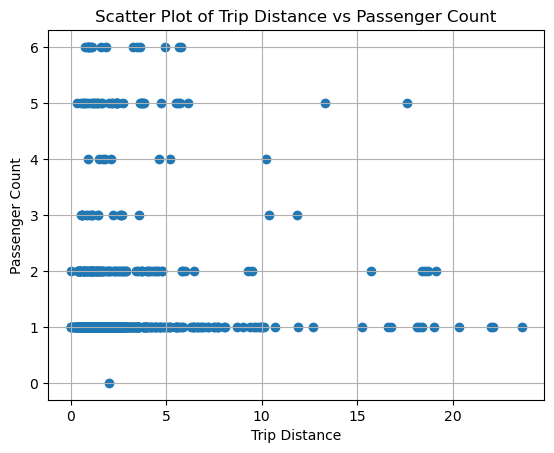

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['Trip_Distance'], df['Passenger_Count'])

# Add labels and title
plt.xlabel('Trip Distance')
plt.ylabel('Passenger Count')
plt.title('Scatter Plot of Trip Distance vs Passenger Count')
plt.grid()
# Show plot
plt.show()

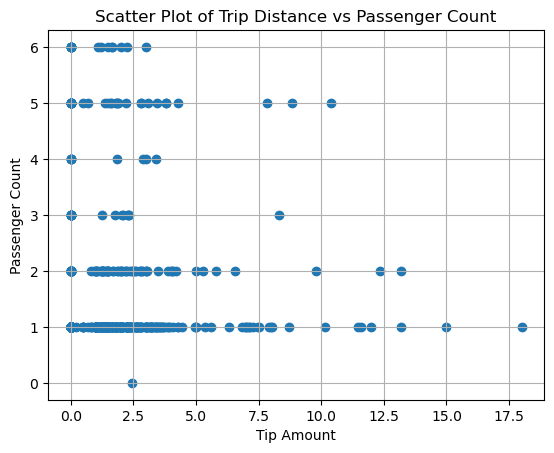

In [38]:
plt.scatter(df['Tip_Amount'], df['Passenger_Count'])

# Add labels and title
plt.xlabel('Tip Amount')
plt.ylabel('Passenger Count')
plt.title('Scatter Plot of Trip Distance vs Passenger Count')
plt.grid()
# Show plot
plt.show()

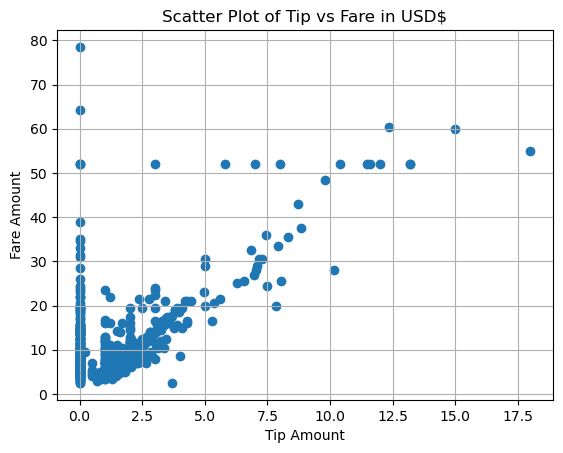

In [39]:
plt.scatter(df['Tip_Amount'], df['Fare_Amount'])

# Add labels and title
plt.xlabel('Tip Amount')
plt.ylabel('Fare Amount')
plt.title('Scatter Plot of Tip vs Fare in USD$')
plt.grid()
# Show plot
plt.show()

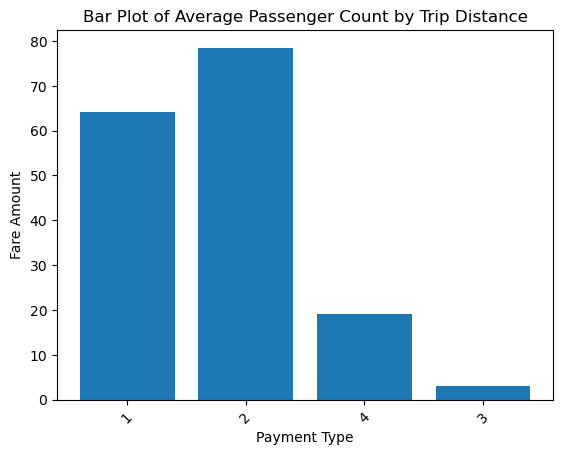

In [40]:
plt.bar(df['Payment_Type'], df['Fare_Amount'])

# Add labels and title
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.title('Bar Plot of Average Passenger Count by Trip Distance')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.show()

In [42]:
##============== WARNING MAKES EVERYTHING SUPER SUPER SLOW. COMMENT THIS OUT WHEN NOT IN USE
##============== SAVED IT AS HTML ALREADY, Just use that---> SEE GIT HUB
# import folium
# mymap = folium.Map(location=[df['Pickup_Latitude'].iloc[0], df['Pickup_Longitude'].iloc[0]], zoom_start=14)

# # Add markers for pickup locations
# for index, row in df.iterrows():
#     folium.Marker([row['Pickup_Latitude'], row['Pickup_Longitude']], popup='Pickup').add_to(mymap)

# # Add markers for dropoff locations with red color
# for index, row in df.iterrows():
#     folium.Marker([row['Dropoff_Latitude'], row['Dropoff_Longitude']], popup='Dropoff',
#                   icon=folium.Icon(color='red')).add_to(mymap)

# # Add lines connecting pickup and dropoff locations
# for index, row in df.iterrows():
#     folium.PolyLine(locations=[[row['Pickup_Latitude'], row['Pickup_Longitude']],
#                                [row['Dropoff_Latitude'], row['Dropoff_Longitude']]], 
#                     color='blue').add_to(mymap)

# # Save the map to an HTML file
# mymap.save("map_with_lines_and_colored_dropoff.html")

# # Display the map
# mymap

In [43]:
##=========== MAKING A DF WITH 10 LONGEST AND 10 SHORTEST TRIPS AND GONNA PUT THEM ON THE MAP
shortest_trips = rawDF.orderBy("Trip_Distance").limit(10)

# Get the 10 largest trips by 'Trip Distance'
largest_trips = rawDF.orderBy(col("Trip_Distance").desc()).limit(10)

# Combine the 10 shortest and 10 largest trips into a single DataFrame
ls_df = shortest_trips.union(largest_trips)

#pandas conversion for map
ls_df=ls_df.toPandas()

In [44]:
SLmap = folium.Map(location=[ls_df['Pickup_Latitude'].iloc[0], ls_df['Pickup_Longitude'].iloc[0]], zoom_start=13)

# Add markers for pickup locations
for index, row in df.iterrows():
    folium.Marker([row['Pickup_Latitude'], row['Pickup_Longitude']], popup='Pickup').add_to(SLmap)

# Add markers for dropoff locations with red color
for index, row in ls_df.iterrows():
    folium.Marker([row['Dropoff_Latitude'], row['Dropoff_Longitude']], popup='Dropoff',
                  icon=folium.Icon(color='red')).add_to(SLmap)

# Add lines connecting pickup and dropoff locations
for index, row in ls_df.iterrows():
    folium.PolyLine(locations=[[row['Pickup_Latitude'], row['Pickup_Longitude']],
                               [row['Dropoff_Latitude'], row['Dropoff_Longitude']]], 
                    color='green').add_to(SLmap)

# Save the map to an HTML file
SLmap.save("Short_Long_Map.html")

# Display the map
SLmap